# 2. EDA(Exploratory Data Analysis)

#### Importing the required libraries for analysis,representation and modeling

In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
pd.set_option('display.max_rows', 10)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [63]:
# reading the data from provided dataset
data = pd.read_csv('Final.csv') 

In [64]:
# display the top 5 rows of data 
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,NaN,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,NaN,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [65]:
# summary of the statistics for the columns of the data
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,296.000000,298.000000,299.000000,301.000000
mean,2013.627907,4.650000,7.669238,36898.133779,0.043189
std,2.891554,5.105555,8.675705,39002.362630,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.875000,1.215000,15000.000000,0.000000
50%,2014.000000,3.555000,6.625000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48383.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**From the above grid we can say that minimum year in 2003 and 25% of the vehicle model are between 2003 and 2012. Next 25% of the vehicle models are between 2012 to 2014 and so on. From this, we can infer that more recent model have more reselling.**

In [66]:
# checking the data types of the columns
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven       float64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

### Data Distribution and Skewness

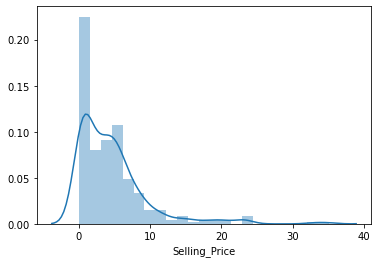

In [67]:
# the data is not normally distributed as you can see we will be predicting the selling price 
# but the selling price is positively skewed
sns.distplot(data['Selling_Price'])
# skewness will be removed after we detect the outliers

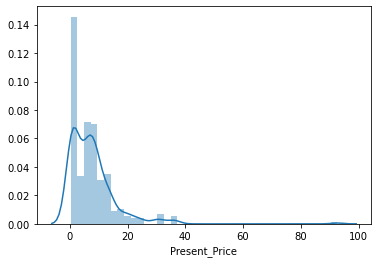

In [68]:
# checking skewness on present price
sns.distplot(data['Present_Price'],bins = 40) #positive skewed

### Outlier Detection

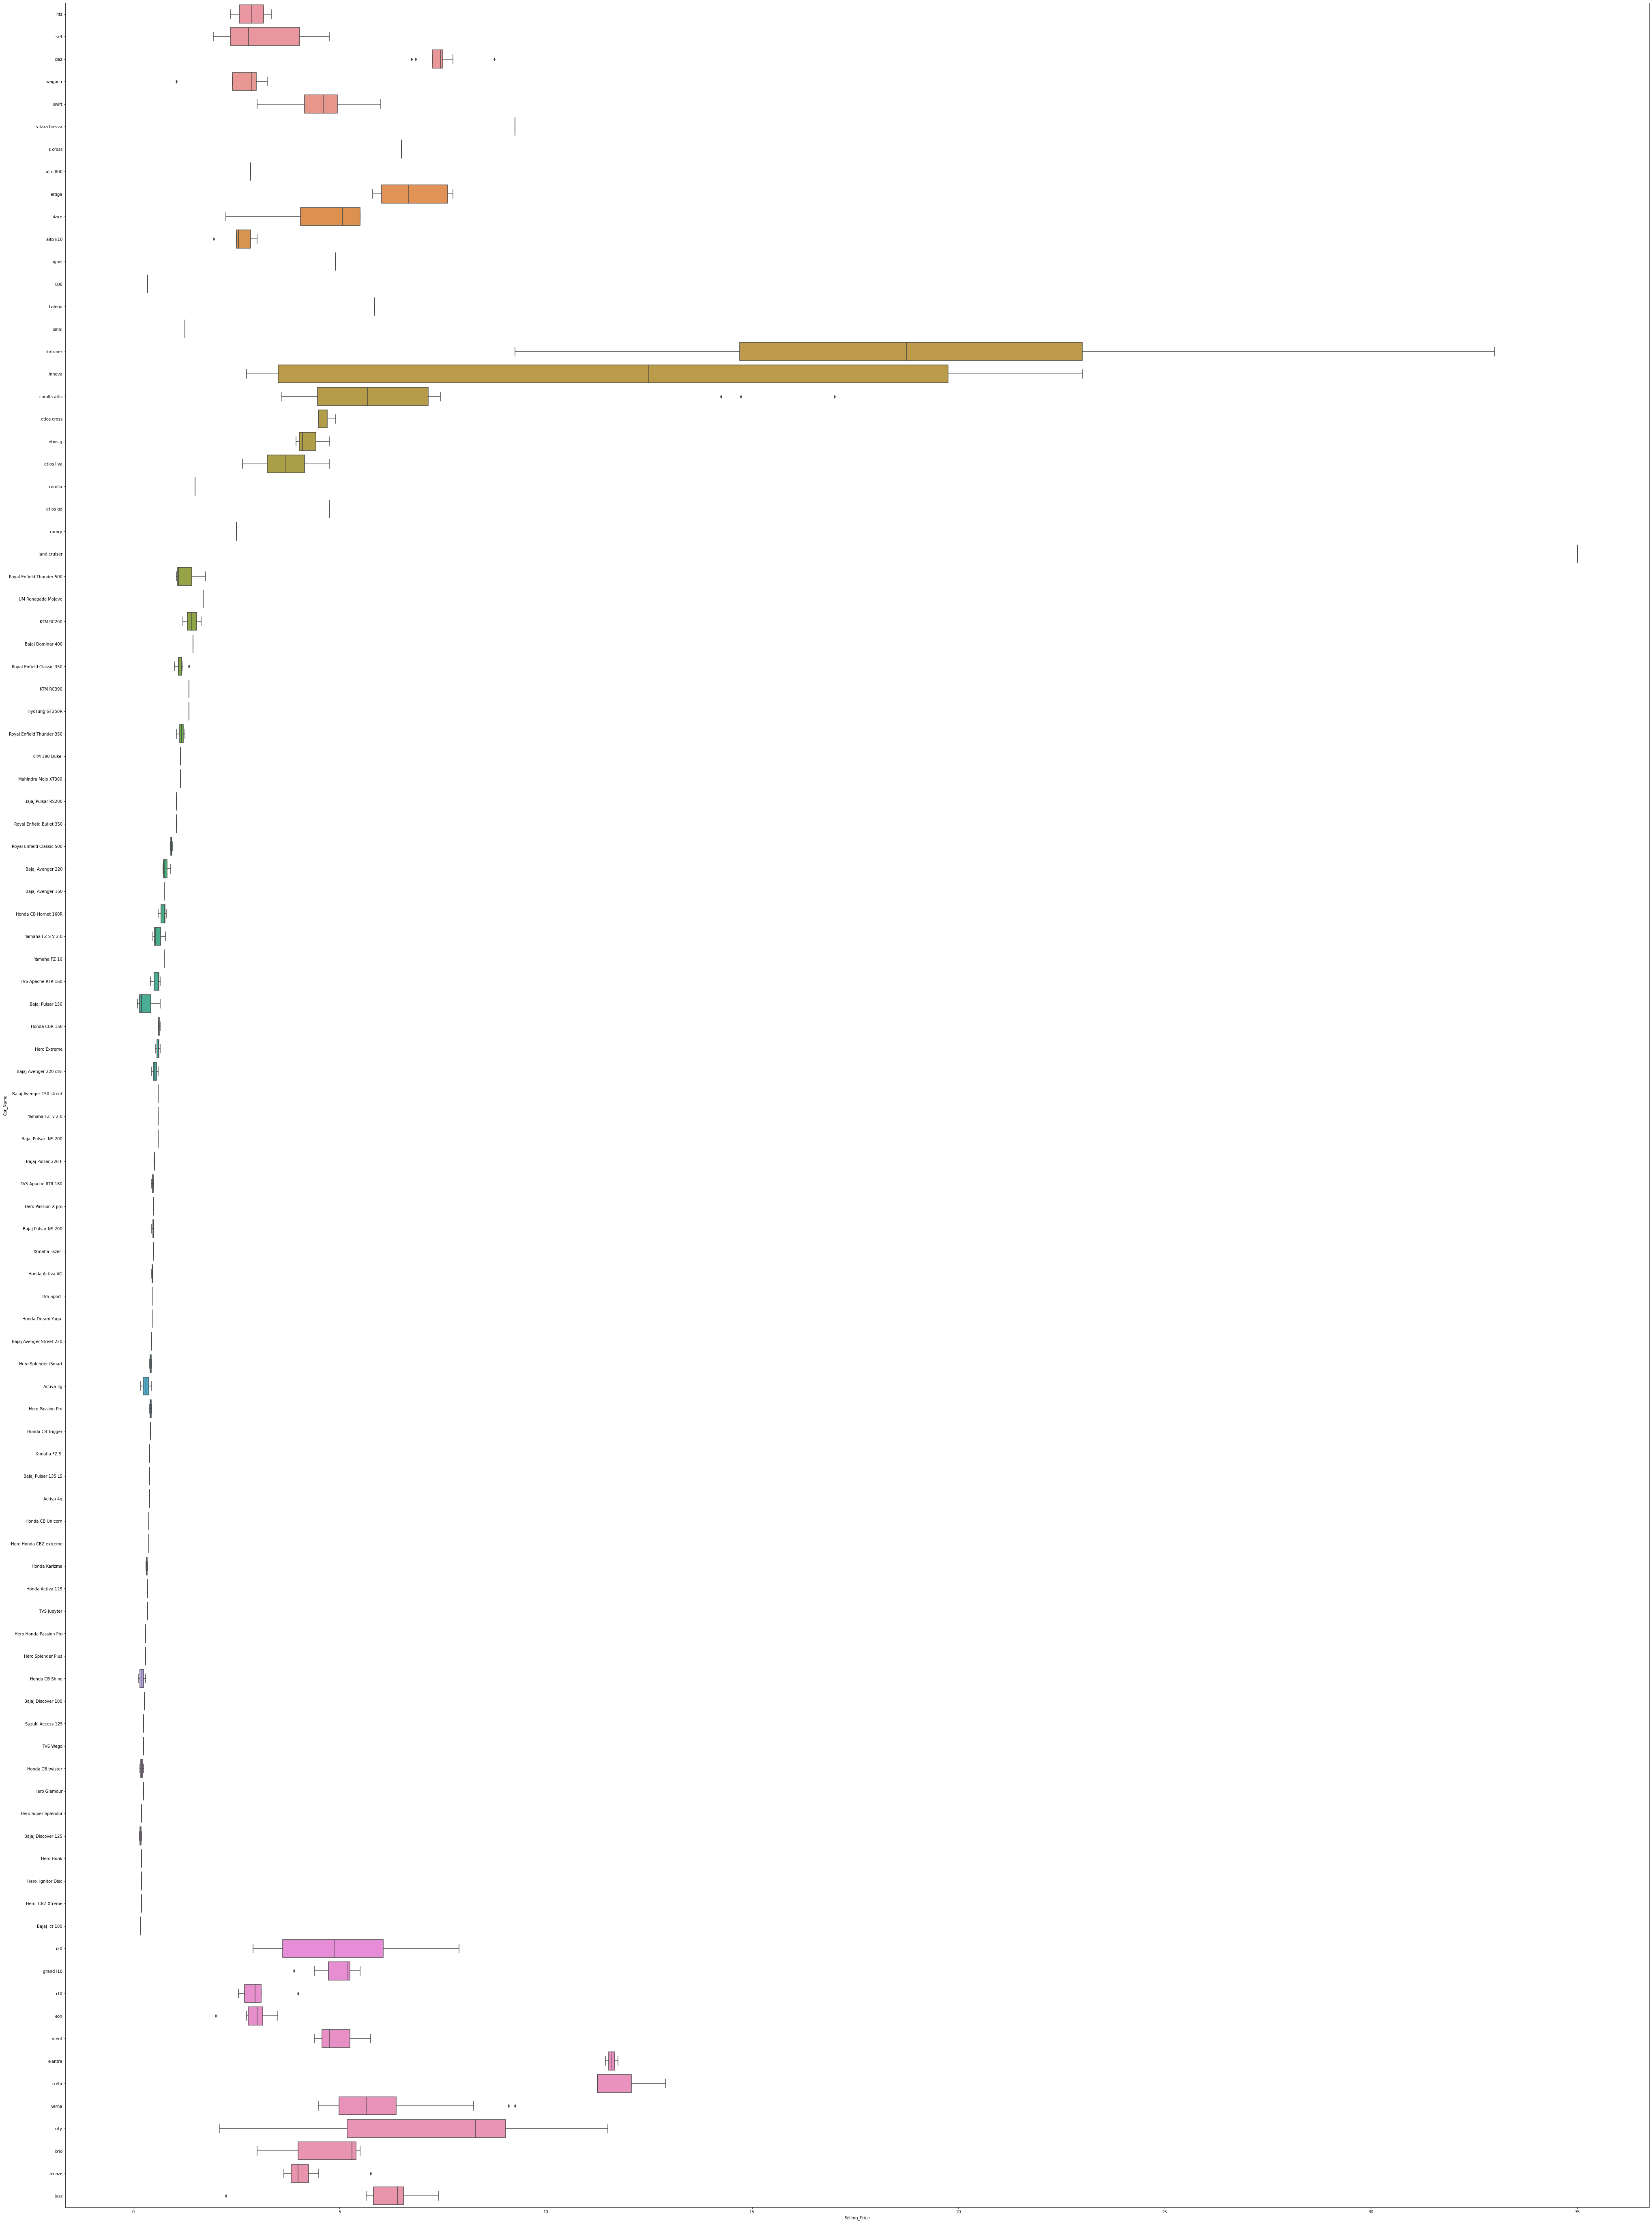

In [69]:
# observing that the vehicles having Present price less than 2 Lakh's are bikes and as we have to consider only cars, 
# so we have categorized all the bikes as outliers.
plt.figure(figsize= (70,100))
boxpt = sns.boxplot(x="Selling_Price", y="Car_Name", data=data)
plt.show()

### Relationships of Features with each other

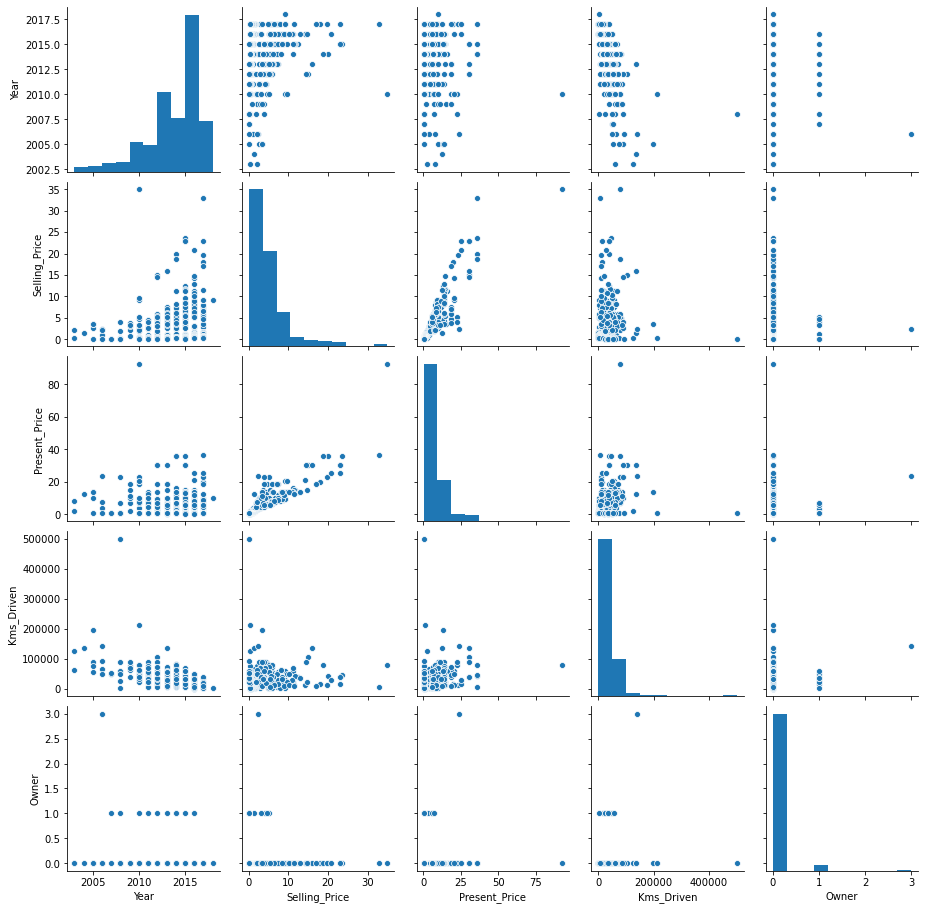

In [70]:
sns.pairplot(data)

### Handling Missing Values
#### For Categorica data: Replaced NaN with mode
<ol>
<li>Fuel_Type</li>
<li>Transmission</li>
<li>Seller_Type</li>
</ol>

#### For Numerical/Continuous values: Replaced NaN with mean
<ol>
<li>Selling_Price</li>
<li>Present_Price</li>
<li>Kms_Driven</li>
</ol>

In [71]:
# create new feature Type to assign the type of the vehicle if it is a Bike or a car
# on deep diving into the data we found that the present price of car is not less than 1.9 
# and in this condition 4 bikes were also coming.
data['Type'] = np.where((data.Car_Name.str.strip() == 'KTM RC390') | 
                        (data.Car_Name.str.strip() == 'Hyosung GT250R') | 
                        (data.Car_Name.str.strip() == 'KTM 390 Duke') |
                        (data.Car_Name.str.strip() == 'Hero  CBZ Xtreme') |
                        (data.Present_Price <= 1.900), 'Bike', 'Car')

In [72]:
data[["Car_Name", "Type"]].sort_values("Type")# checking the type of the vehicle if it is correctly categorized or not

,Car_Name,Type
150,TVS Apache RTR 180,Bike
126,Bajaj Avenger 220,Bike
127,Bajaj Avenger 150,Bike
128,Honda CB Hornet 160R,Bike
129,Yamaha FZ S V 2.0,Bike
...,...,...
71,corolla altis,Car
72,corolla altis,Car
73,etios liva,Car
63,fortuner,Car


In [73]:
# Number of Vehicles per Type 
data[["Car_Name", "Type"]].groupby(['Type'], as_index=True).count().sort_values(by='Car_Name', ascending=True)

,Car_Name
Type,
Bike,101
Car,200


In [74]:
data = data.loc[data['Type'] == 'Car'] # removed te outliers, selected only cars from the dataset

In [75]:
# dropping the indexes of rows where the difference in selling price to present price differnce is huge.
data = data.drop([
37
,55
,85
,77
,78
,94
,90
], axis=0)

In [76]:
# Removing the Type column as it contains only Car Type
data = data.drop('Type', axis=1)

In [77]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,NaN,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,NaN,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,NaN,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [78]:
fuel_mode = data.Fuel_Type.dropna().mode()[0] # mode of Fuel_Type

In [79]:
data['Fuel_Type'] = data['Fuel_Type'].fillna(fuel_mode) # replacing NaN with mode of Fuel_Type

In [80]:
transmission_mode = data.Transmission.dropna().mode()[0] # mode of transmission

In [81]:
data['Transmission'] = data['Transmission'].fillna(transmission_mode) # replacing NaN with mode of Transmission

In [82]:
seller_mode = data.Seller_Type.dropna().mode()[0] # mode of Seller_Type

In [83]:
data['Seller_Type'] = data['Seller_Type'].fillna(seller_mode) # replacing NaN with mode of Seller_Type

In [84]:
data = data.fillna(data.groupby(['Year', 'Car_Name']).transform('mean')) # replace all NaN data with the respective mean

In [85]:
# replacing any left over NaN in the above step because of group by clause
data = data.fillna(data.groupby('Car_Name').transform('mean'))

In [86]:
# replacing left over with mean of total value (irrespective of any grouping)
data = data.fillna(data.mean())

In [87]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,2013.829016,6.829585,10.772435,39145.072539,0.020725
std,2.601439,5.183169,8.863294,24712.528339,0.142834
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2013.000000,3.750000,6.400000,21200.000000,0.000000
50%,2015.000000,5.300000,8.400000,38244.000000,0.000000
75%,2016.000000,7.750000,12.500000,50024.000000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


### Business Questions

**1. Top 10 highest selling price vehicles**

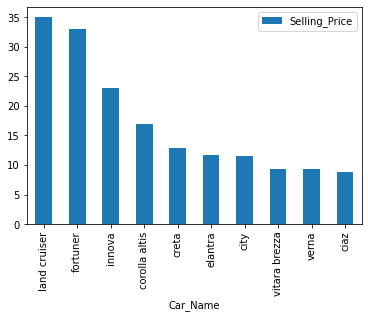

In [88]:
highest_selling_price_vehicles = data[["Car_Name", "Selling_Price"]].groupby("Car_Name").max().sort_values("Selling_Price", ascending=False)[:10].plot(kind='bar')

**2. Top 10 companies more in sale**

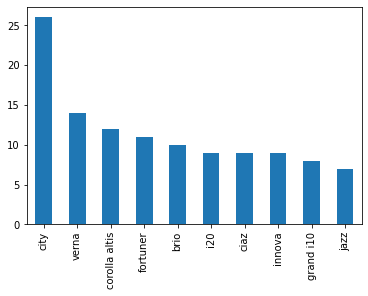

In [89]:
companies_in_sale = data['Car_Name'].value_counts()[:10].plot(kind="bar")

**3. Avg difference between Selling and Current Price**

<ipython-input-90-996ef1ed64b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_avg["diff"] = data_avg["Present_Price"] - data_avg["Selling_Price"]


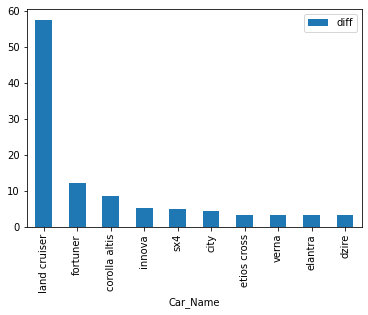

In [90]:
data_avg = data[["Car_Name", "Selling_Price", "Present_Price"]]
data_avg["diff"] = data_avg["Present_Price"] - data_avg["Selling_Price"]
avg_diff = data_avg[['Car_Name', 'diff']].groupby('Car_Name').mean().sort_values('diff', ascending=False)[:10].plot(kind='bar')

**4. Fuel_type mostly used by vehicle**

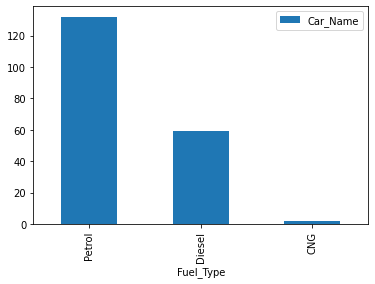

In [91]:
ft_mode = data[["Fuel_Type", "Car_Name"]].groupby("Fuel_Type").count().sort_values("Car_Name", ascending=False).plot(kind="bar")

**5. Most reselling vehicle**

<ipython-input-92-f3e01c478bc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_veh["Owner"] = res_veh["Owner"] + 1


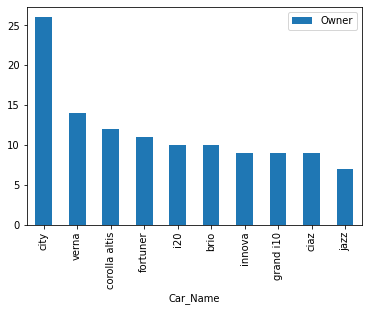

In [92]:
res_veh = data[["Car_Name", "Owner"]]
res_veh["Owner"] = res_veh["Owner"] + 1
most_reselling_vehicle = res_veh.groupby("Car_Name").sum().sort_values("Owner", ascending=False)[:10].plot(kind="bar")

**6. Transmission used by most vehicles**

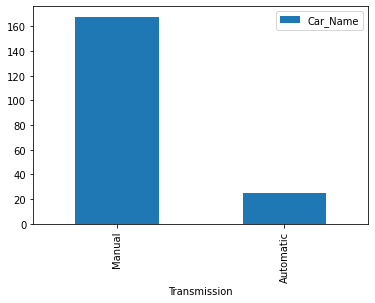

In [93]:
trans_veh = data[["Car_Name", "Transmission"]].groupby("Transmission").count().sort_values("Car_Name", ascending=False).plot(kind="bar")

**7. Relation between Selling_Price and Kms_Driven**

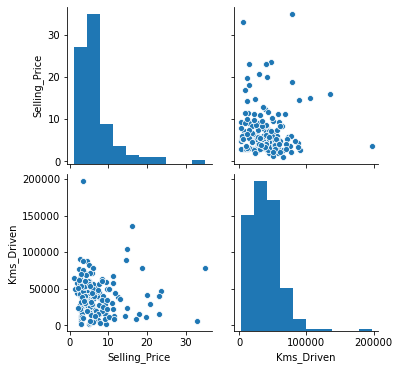

In [94]:
# More the Kms_Driven, lesser the selling_price
# Negatively correlated
sns.pairplot(data[['Selling_Price', 'Kms_Driven']])

**8. Seller type driving more business**

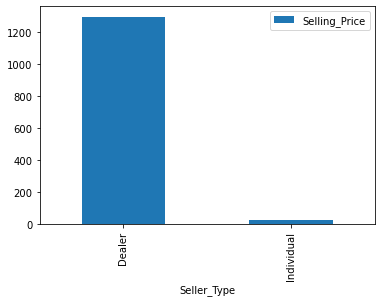

In [95]:
max_business = data[["Seller_Type", "Selling_Price"]].groupby("Seller_Type").sum().sort_values("Selling_Price", ascending=False).plot(kind="bar")

**Cars and their minimum selling price**

In [96]:
data[["Car_Name", "Selling_Price"]].groupby(['Car_Name'], as_index=True).min().sort_values(by='Selling_Price', ascending=True)

,Selling_Price
Car_Name,
wagon r,1.05
omni,1.25
alto k10,1.95
sx4,1.95
eon,2.00
...,...
fortuner,9.25
vitara brezza,9.25
creta,11.25


**Cars and their minimum present price**

In [97]:
data[["Car_Name", "Present_Price"]].groupby(['Car_Name'], as_index=True).min().sort_values(by='Present_Price', ascending=True)

,Present_Price
Car_Name,
omni,2.69
alto k10,3.46
alto 800,3.60
wagon r,4.15
i10,4.43
...,...
corolla altis,12.48
creta,13.60
elantra,14.79


### Label Encoding:
#### 1. For Categorical values (where there are less number of distinct values - refer below), created a dictionary and used replace command
<ol>
<li>Fuel_Type</li>
<li>Transmission</li>
<li>Seller_Type</li>
</ol>

#### 2. For values, where there are more number of values (like car_name, used the LabelEncoder() library

In [98]:
# Get NaN rows from dataframe
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]
Index: []


In [99]:
convert_cat_to_numericals = {"Fuel_Type":     {"Petrol": 0, "Diesel": 1, "CNG": 2},
                "Transmission": {"Manual": 0, "Automatic": 1},
                "Seller_Type": {"Individual": 0, "Dealer": 1}}

In [100]:
data.replace(convert_cat_to_numericals, inplace=True)

In [101]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Car_Name'. 
data['Car_Name']= label_encoder.fit_transform(data['Car_Name']) 

In [102]:
data.describe()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,14.937824,2013.829016,6.829585,10.772435,39145.072539,0.326425,0.984456,0.129534,0.020725
std,9.610989,2.601439,5.183169,8.863294,24712.528339,0.491783,0.124025,0.336663,0.142834
min,0.000000,2003.000000,1.050000,2.690000,2071.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2013.000000,3.750000,6.400000,21200.000000,0.000000,1.000000,0.000000,0.000000
50%,14.000000,2015.000000,5.300000,8.400000,38244.000000,0.000000,1.000000,0.000000,0.000000
75%,22.000000,2016.000000,7.750000,12.500000,50024.000000,1.000000,1.000000,0.000000,0.000000
max,33.000000,2018.000000,35.000000,92.600000,197176.000000,2.000000,1.000000,1.000000,1.000000


### Correlation
<ol>
<li>1 - Strongly Correlated Positively (when one value increases, other also increases)</li>
<li>-1 - Strongly Correlated Negatively (when one value increases, other decreases)</li>
<li>0 - Unrelated</li>
</ol>

In [103]:
data.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,-0.215823,-0.007405,0.011209,0.092272,0.177321,-0.096942,0.041134,0.095794
Year,-0.215823,1.000000,0.319381,-0.026146,-0.633015,0.031641,0.104719,0.144358,-0.004430
Selling_Price,-0.007405,0.319381,1.000000,0.861742,-0.047468,0.395430,-0.034525,0.538181,-0.070129
Present_Price,0.011209,-0.026146,0.861742,1.000000,0.240362,0.342298,-0.071035,0.408958,-0.068581
Kms_Driven,0.092272,-0.633015,-0.047468,0.240362,1.000000,0.292647,-0.210315,0.004218,-0.029122
Fuel_Type,0.177321,0.031641,0.395430,0.342298,0.292647,1.000000,-0.001770,0.120779,-0.022667
Seller_Type,-0.096942,0.104719,-0.034525,-0.071035,-0.210315,-0.001770,1.000000,-0.076264,0.018280
Transmission,0.041134,0.144358,0.538181,0.408958,0.004218,0.120779,-0.076264,1.000000,-0.056120
Owner,0.095794,-0.004430,-0.070129,-0.068581,-0.029122,-0.022667,0.018280,-0.056120,1.000000


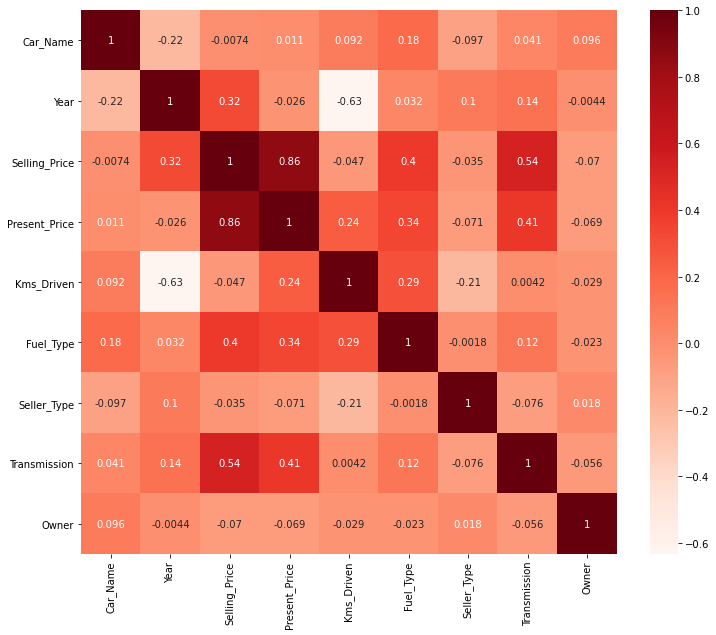

In [104]:
# Heatmap representation
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

### Feature Selection and importance based on Correlation

In [105]:
# Correlation with output variable (used abs as we need both positive and negative relation)
cor_target = abs(corr["Selling_Price"])
# Selecting highly correlated features (considering > 30%)
relevant_features = cor_target[cor_target > 0.3]
relevant_features

Year             0.319381
Selling_Price    1.000000
Present_Price    0.861742
Fuel_Type        0.395430
Transmission     0.538181
Name: Selling_Price, dtype: float64

### Dependent Variables
<ol>
<li>Year</li>
<li>Present_Price</li>
<li>Fuel_Type</li>
<li>Transmission</li>
</ol>

### Independent Variable
<ol>
<li>Selling_Price</li>
</ol>

In [106]:
# Checking if the independent variables are uncorrelated with each other
print(data[["Year","Present_Price"]].corr())
print('-'*50)
print(data[["Year","Fuel_Type"]].corr())
print('-'*50)
print(data[["Year","Transmission"]].corr())
print('-'*50)
print(data[["Present_Price","Fuel_Type"]].corr())
print('-'*50)
print(data[["Present_Price","Transmission"]].corr())
print('-'*50)
print(data[["Fuel_Type","Transmission"]].corr())

                   Year  Present_Price
Year           1.000000      -0.026146
Present_Price -0.026146       1.000000
--------------------------------------------------
               Year  Fuel_Type
Year       1.000000   0.031641
Fuel_Type  0.031641   1.000000
--------------------------------------------------
                  Year  Transmission
Year          1.000000      0.144358
Transmission  0.144358      1.000000
--------------------------------------------------
               Present_Price  Fuel_Type
Present_Price       1.000000   0.342298
Fuel_Type           0.342298   1.000000
--------------------------------------------------
               Present_Price  Transmission
Present_Price       1.000000      0.408958
Transmission        0.408958      1.000000
--------------------------------------------------
              Fuel_Type  Transmission
Fuel_Type      1.000000      0.120779
Transmission   0.120779      1.000000


#### As seen above, Present_Price with Fuel_Type and Transmission have positive correlation > 30% and hence we can neglect Fuel_Type as Present_Price have strong correlation with Selling_price


## Final Features/variables

### Dependent Variables
<ol>
<li>Year</li>
<li>Present_Price</li>
</ol>

### Independent Variable
<ol>
<li>Selling_Price</li>
</ol>

### Relationship between the features

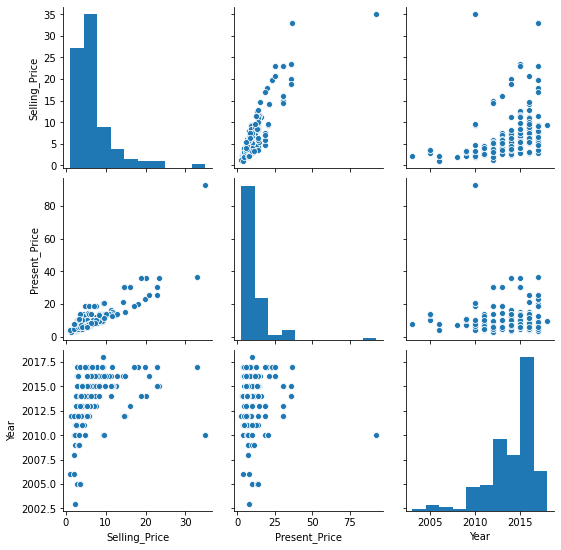

In [107]:
data = data[["Selling_Price", "Present_Price", "Year"]]
sns.pairplot(data)

In [108]:
data

,Selling_Price,Present_Price,Year
0,3.35,5.59,2014
1,4.75,9.54,2013
2,7.25,9.85,2017
3,2.85,4.15,2011
4,4.60,6.87,2014
...,...,...,...
296,9.63,11.60,2016
297,4.00,5.90,2015
298,3.35,11.00,2009
299,11.50,12.50,2017


### Applying Regression model and prediction with score, MSE and MAE values

#### Used LinearRegression, Lasso and Ridge models
#### Also, for model evaluation, used K-fold cross validation and taken the average score of the model to make sure that the data is not overfitted or underfitted and the testing is done on all possible splits
**Tried different values for K between 5 to 10 and found 7 has given the best result**

In [109]:
# Splitting 90% of data for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(data.drop('Selling_Price',axis=1), 
                                                    data['Selling_Price'], test_size=0.1, 
                                                    random_state=101)

#### Linear Regression

90.53455811028384%
3.2125587669496283
1.2519380801207038


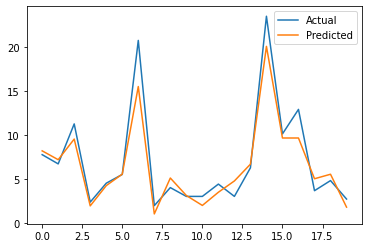

In [110]:
# Linear Regression Model
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
predictions = linmodel.predict(X_test)
score = linmodel.score(X_test, y_test)
print(f'{score*100}%')

MSE = print(mean_squared_error(y_test, predictions))
MAE = print(mean_absolute_error(y_test, predictions))
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': predictions.flatten()}).plot(kind="line")
df

#### Lasso Regression

89.09201665848727%
3.7021554748109144
1.188411021244067


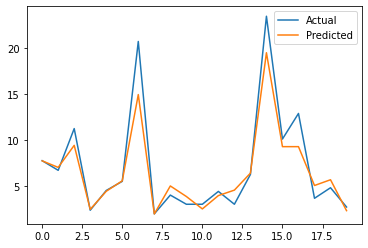

In [111]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
y_pred_lass = lasso_reg.predict(X_test)
print(f'{lasso_reg.score(X_test, y_test)*100}%')
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_lass.flatten()}).plot(kind="line")
MSE = print(mean_squared_error(y_test, y_pred_lass))
MAE = print(mean_absolute_error(y_test, y_pred_lass))

#### Ridge Regression

90.53179779842844%
3.21349561323255
1.2516157786895978


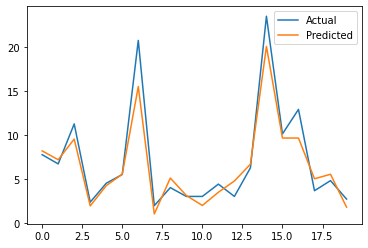

In [112]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_rid = ridge_reg.predict(X_test)
print(f'{ridge_reg.score(X_test, y_test)*100}%')
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_rid.flatten()}).plot(kind="line")
df
MSE = print(mean_squared_error(y_test, y_pred_rid))
MAE = print(mean_absolute_error(y_test, y_pred_rid))

#### Using K-fold validation

In [113]:
kf = KFold(n_splits=7, random_state=1)
kf.get_n_splits(data.drop('Selling_Price',axis=1))
print(kf)

KFold(n_splits=7, random_state=1, shuffle=False)


C:\Users\v-krgarg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [114]:
X = np.array(data.drop('Selling_Price',axis=1))
y = np.array(data['Selling_Price'])

#### Linear Regression 7-Fold Validation (as k = 7)

In [115]:
model_score_lin = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linmodel = LinearRegression()
    linmodel.fit(X_train,y_train)
    predictions = linmodel.predict(X_test)
    score = linmodel.score(X_test, y_test)
    model_score_lin.append(score)
    print(f'Score: {score*100}%')
    print(f'MSE: {mean_squared_error(y_test, predictions)}')
    print(f'MAE: {mean_absolute_error(y_test, predictions)}')
    print('-'*30)
    
print(f'Average score of linear regression: {np.array(model_score_lin).mean()*100}%')

75.8761725840594%
84.89288476811116%
71.2608633224247%
83.17731142255799%
82.81058884984253%
80.02974951186123%
86.58025199927731%
Average score of linear regression: 80.66111749401918%


#### Lasso Regression 7-Fold Validation (as k = 7)

In [116]:
model_score_lasso = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso_reg = Lasso()
    lasso_reg.fit(X_train,y_train)
    y_pred_lass = lasso_reg.predict(X_test)
    score = lasso_reg.score(X_test, y_test)
    print(f'Score: {lasso_reg.score(X_test, y_test)*100}%')
    model_score_lasso.append(score)
    print(f'MSE: {mean_squared_error(y_test, y_pred_lass)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred_lass)}')
    print('-'*30)

print(f'Average score of Lasso regression: {np.array(model_score_lasso).mean()*100}%')

81.76542035063295%
0.8324225160290518
0.7323952200311997
87.77552661730003%
3.4684807059057308
1.1486727275278619
73.4708921602843%
21.5849305284332
3.017842833342204
81.48344213596206%
5.137014331181044
1.5113031469004565
82.83355282018971%
0.9893943292203192
0.7442535155387889
79.91937966641116%
1.1875083883941226
0.8803278418244763
86.87829220684706%
0.8393423327152592
0.7492954884753973
Average score of Lasso regression: 82.01807227966104%


#### Ridge Regression 7-Fold Validation (as k = 7)

In [117]:
# Ridge Regression
model_score_ridge = []
from sklearn.linear_model import Ridge
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ridge_reg = Ridge()
    ridge_reg.fit(X_train, y_train)
    y_pred_rid = ridge_reg.predict(X_test)
    score = ridge_reg.score(X_test, y_test)
    print(f'Score: {ridge_reg.score(X_test, y_test)*100}%')
    model_score_ridge.append(score)
    print(f'MSE: {mean_squared_error(y_test, y_pred_rid)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred_rid)}')
    print('-'*30)
        
print(f'Average score of Ridge regression: {np.array(model_score_ridge).mean()*100}%')

75.91342439871434%
84.91516838641668%
71.27285886411246%
83.17382159310928%
82.81586913452279%
80.0361466833209%
86.59057177936366%
Average score of Ridge regression: 80.67398011993716%
0.8577466394244639
0.722649731816336


### Conclusion

**When we have performed training on the model where the training dataset is always the same(random-state) the Linear and ridge models perfomed the best whereas when we performed training uisng K-Fold cross validation(where every combination of split created is used as training and test data) then the laaso model is performing the best**
